In [167]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [168]:
class GraphState(TypedDict):
    message: str

In [169]:
def node_a(state: GraphState) -> GraphState:
    state['message'] = "Im in Node A"
    return state

def node_b(state: GraphState) -> GraphState:
    state['message'] = "Im in Node B"
    return state

def node_c(state: GraphState) -> GraphState:
    state['message'] = "Im in Node C"
    return state

In [170]:
graph_builder = StateGraph(GraphState)
graph_builder.set_entry_point("A")
graph_builder.add_node("A", node_a )
graph_builder.add_node("B", node_b )
graph_builder.add_node("C", node_c )
graph_builder.add_edge("A", "B")
graph_builder.add_edge("A", "C")
graph_builder.set_finish_point("B")
graph_builder.set_finish_point("C")
graph = graph_builder.compile()

In [171]:
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image, display

def draw_graph(graph: CompiledStateGraph):
    display(Image(graph.get_graph().draw_mermaid_png()))


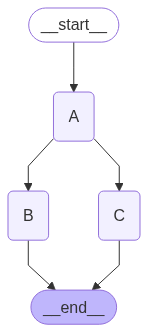

In [172]:
draw_graph(graph)

In [173]:
result = graph.invoke({"message", ""})

InvalidUpdateError: Expected dict, got {'', 'message'}
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE

In [ ]:
from operator import add
from typing import Annotated
class UpdatedGraphState(TypedDict):
    messages: Annotated[str,add]

In [ ]:
def node_a(state: UpdatedGraphState) -> UpdatedGraphState:
    state['messages'] = "Im in Node A "
    return state

def node_b(state: UpdatedGraphState) -> UpdatedGraphState:
    state['messages'] = "Im in Node B " 
    return state

def node_c(state: UpdatedGraphState) -> UpdatedGraphState:
    state['messages'] = "Im in Node C "
    return state

In [ ]:
graph_builder = StateGraph(UpdatedGraphState)
graph_builder.set_entry_point("A")
graph_builder.add_node("A", node_a )
graph_builder.add_node("B", node_b )
graph_builder.add_node("C", node_c )
graph_builder.add_edge("A", "B")
graph_builder.add_edge("A", "C")
graph_builder.set_finish_point("B")
graph_builder.set_finish_point("C")
graph = graph_builder.compile()

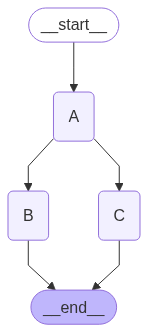

In [ ]:
draw_graph(graph)

In [ ]:
result = graph.invoke({"messages": ""})

In [ ]:
print(result)


{'messages': 'Im in Node A Im in Node B Im in Node C '}


In [ ]:
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage, AnyMessage

In [ ]:
from langgraph.graph import add_messages

In [ ]:
messages = []

In [ ]:
messages = add_messages(messages,[HumanMessage("How are you")])

In [ ]:
messages

[HumanMessage(content='How are you', additional_kwargs={}, response_metadata={}, id='cde88fc2-54d4-40ff-b2b4-db49180310e5')]

In [ ]:
messages = add_messages(messages,[HumanMessage("What are you"), AIMessage("Im an LLM"), HumanMessage("What is LLM?")])

In [ ]:
messages

[HumanMessage(content='How are you', additional_kwargs={}, response_metadata={}, id='cde88fc2-54d4-40ff-b2b4-db49180310e5'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='9e1172ea-afcb-490a-9d43-e9ee6bb96c5f'),
 AIMessage(content='Im an LLM', additional_kwargs={}, response_metadata={}, id='c70563f8-8896-41d3-976e-511db9018045'),
 HumanMessage(content='What is LLM?', additional_kwargs={}, response_metadata={}, id='841611d3-df3e-4bd1-9b6d-643767c03117')]

In [ ]:
my_message = SystemMessage("You are an helpful assitant")
my_message

SystemMessage(content='You are an helpful assitant', additional_kwargs={}, response_metadata={})

In [ ]:
messages

[HumanMessage(content='How are you', additional_kwargs={}, response_metadata={}, id='cde88fc2-54d4-40ff-b2b4-db49180310e5'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='9e1172ea-afcb-490a-9d43-e9ee6bb96c5f'),
 AIMessage(content='Im an LLM', additional_kwargs={}, response_metadata={}, id='c70563f8-8896-41d3-976e-511db9018045'),
 HumanMessage(content='What is LLM?', additional_kwargs={}, response_metadata={}, id='841611d3-df3e-4bd1-9b6d-643767c03117')]

In [ ]:
messages = add_messages(messages,[my_message])
messages

[HumanMessage(content='How are you', additional_kwargs={}, response_metadata={}, id='cde88fc2-54d4-40ff-b2b4-db49180310e5'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='9e1172ea-afcb-490a-9d43-e9ee6bb96c5f'),
 AIMessage(content='Im an LLM', additional_kwargs={}, response_metadata={}, id='c70563f8-8896-41d3-976e-511db9018045'),
 HumanMessage(content='What is LLM?', additional_kwargs={}, response_metadata={}, id='841611d3-df3e-4bd1-9b6d-643767c03117'),
 SystemMessage(content='You are an helpful assitant', additional_kwargs={}, response_metadata={}, id='3b778f19-493c-45a2-a1bc-25b50d1b7fb3')]

In [ ]:
messages = add_messages(messages,[my_message])
messages

[HumanMessage(content='How are you', additional_kwargs={}, response_metadata={}, id='cde88fc2-54d4-40ff-b2b4-db49180310e5'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='9e1172ea-afcb-490a-9d43-e9ee6bb96c5f'),
 AIMessage(content='Im an LLM', additional_kwargs={}, response_metadata={}, id='c70563f8-8896-41d3-976e-511db9018045'),
 HumanMessage(content='What is LLM?', additional_kwargs={}, response_metadata={}, id='841611d3-df3e-4bd1-9b6d-643767c03117'),
 SystemMessage(content='You are an helpful assitant', additional_kwargs={}, response_metadata={}, id='3b778f19-493c-45a2-a1bc-25b50d1b7fb3')]

In [ ]:
messages = add_messages(messages,[SystemMessage("You are an helpful assitant")])
messages

[HumanMessage(content='How are you', additional_kwargs={}, response_metadata={}, id='cde88fc2-54d4-40ff-b2b4-db49180310e5'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='9e1172ea-afcb-490a-9d43-e9ee6bb96c5f'),
 AIMessage(content='Im an LLM', additional_kwargs={}, response_metadata={}, id='c70563f8-8896-41d3-976e-511db9018045'),
 HumanMessage(content='What is LLM?', additional_kwargs={}, response_metadata={}, id='841611d3-df3e-4bd1-9b6d-643767c03117'),
 SystemMessage(content='You are an helpful assitant', additional_kwargs={}, response_metadata={}, id='3b778f19-493c-45a2-a1bc-25b50d1b7fb3'),
 SystemMessage(content='You are an helpful assitant', additional_kwargs={}, response_metadata={}, id='0c663131-098d-4596-a09f-64fddc2d9544')]

In [ ]:
class MessageUpdateState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [ ]:
def node_a(state: MessageUpdateState) -> MessageUpdateState:
    state['messages'] = HumanMessage('Who are you')
    return state

In [ ]:
def node_b(state: MessageUpdateState) -> MessageUpdateState:
    state['messages'] = HumanMessage('Why are you')
    return state

In [ ]:
def node_c(state: MessageUpdateState) -> MessageUpdateState:
    state['messages'] = HumanMessage('What are you')
    return state

In [ ]:
message_graph_builder = StateGraph(MessageUpdateState)
message_graph_builder.add_node("A", node_a)
message_graph_builder.add_node("B", node_b)
message_graph_builder.add_node("C", node_c)
message_graph_builder.add_edge(START, "A")
message_graph_builder.add_edge(START, "B")
message_graph_builder.add_edge(START, "C")
message_graph_builder.set_finish_point("A")
message_graph_builder.set_finish_point("B")
message_graph_builder.set_finish_point("C")
message_graph = message_graph_builder.compile()

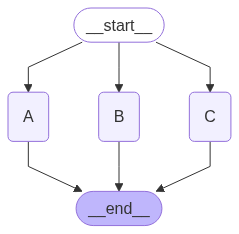

In [ ]:
draw_graph(message_graph)

In [ ]:
result = message_graph.invoke({"messages": []})

In [ ]:
result

{'messages': [HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='da88e568-2b35-473a-9981-f64b42469ffe'),
  HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='854e545c-42e1-4424-9939-698b98a3018d'),
  HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='6ce4a345-6791-420b-bd81-dc5a32014584')]}

In [ ]:
result['messages']

[HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='da88e568-2b35-473a-9981-f64b42469ffe'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='854e545c-42e1-4424-9939-698b98a3018d'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='6ce4a345-6791-420b-bd81-dc5a32014584')]

In [ ]:
result = message_graph.invoke({"messages": result['messages'] })

In [ ]:
result['messages']

[HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='da88e568-2b35-473a-9981-f64b42469ffe'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='854e545c-42e1-4424-9939-698b98a3018d'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='6ce4a345-6791-420b-bd81-dc5a32014584'),
 HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='caa6428d-7f74-4ae7-aa6a-5493fd630bde'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='f6bb8334-420f-4b17-8ca6-159ede910ba8'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='7f57245d-5675-4ec2-a8f0-b057b3fd15b4')]

In [ ]:
result = message_graph.invoke({"messages": result['messages'] })

In [ ]:
result['messages']

[HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='da88e568-2b35-473a-9981-f64b42469ffe'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='854e545c-42e1-4424-9939-698b98a3018d'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='6ce4a345-6791-420b-bd81-dc5a32014584'),
 HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='caa6428d-7f74-4ae7-aa6a-5493fd630bde'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='f6bb8334-420f-4b17-8ca6-159ede910ba8'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='7f57245d-5675-4ec2-a8f0-b057b3fd15b4'),
 HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='32ca4ded-94f1-4202-9060-28cdb047eec1'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='e8405eac-120e-4d12-829d-10f2dbd004d4')

In [ ]:
# Whatever we have done in above steps is already implemented as MessagesState

In [ ]:
from langchain_core.messages import RemoveMessage

In [ ]:
messages = result['messages']
messages

[HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='da88e568-2b35-473a-9981-f64b42469ffe'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='854e545c-42e1-4424-9939-698b98a3018d'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='6ce4a345-6791-420b-bd81-dc5a32014584'),
 HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='caa6428d-7f74-4ae7-aa6a-5493fd630bde'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='f6bb8334-420f-4b17-8ca6-159ede910ba8'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='7f57245d-5675-4ec2-a8f0-b057b3fd15b4'),
 HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='32ca4ded-94f1-4202-9060-28cdb047eec1'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='e8405eac-120e-4d12-829d-10f2dbd004d4')

In [ ]:
all_ids = [message.id for message in result['messages']]
all_ids

['da88e568-2b35-473a-9981-f64b42469ffe',
 '854e545c-42e1-4424-9939-698b98a3018d',
 '6ce4a345-6791-420b-bd81-dc5a32014584',
 'caa6428d-7f74-4ae7-aa6a-5493fd630bde',
 'f6bb8334-420f-4b17-8ca6-159ede910ba8',
 '7f57245d-5675-4ec2-a8f0-b057b3fd15b4',
 '32ca4ded-94f1-4202-9060-28cdb047eec1',
 'e8405eac-120e-4d12-829d-10f2dbd004d4',
 '92700593-f462-4ba1-9af7-31352a5c7126']

In [ ]:
deleted_ids = [message.id for message in result['messages'][:-3]]
deleted_ids

['da88e568-2b35-473a-9981-f64b42469ffe',
 '854e545c-42e1-4424-9939-698b98a3018d',
 '6ce4a345-6791-420b-bd81-dc5a32014584',
 'caa6428d-7f74-4ae7-aa6a-5493fd630bde',
 'f6bb8334-420f-4b17-8ca6-159ede910ba8',
 '7f57245d-5675-4ec2-a8f0-b057b3fd15b4']

In [ ]:
deleted_messages = [ RemoveMessage(id=message.id) for message in result['messages'][:-3] ]


[RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='da88e568-2b35-473a-9981-f64b42469ffe'),
 RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='854e545c-42e1-4424-9939-698b98a3018d'),
 RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='6ce4a345-6791-420b-bd81-dc5a32014584'),
 RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='caa6428d-7f74-4ae7-aa6a-5493fd630bde'),
 RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='f6bb8334-420f-4b17-8ca6-159ede910ba8'),
 RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='7f57245d-5675-4ec2-a8f0-b057b3fd15b4')]

In [ ]:
messsages = add_messages(deleted_messages,result['messages'] )

In [ ]:
messages

[HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='da88e568-2b35-473a-9981-f64b42469ffe'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='854e545c-42e1-4424-9939-698b98a3018d'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='6ce4a345-6791-420b-bd81-dc5a32014584'),
 HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='caa6428d-7f74-4ae7-aa6a-5493fd630bde'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='f6bb8334-420f-4b17-8ca6-159ede910ba8'),
 HumanMessage(content='What are you', additional_kwargs={}, response_metadata={}, id='7f57245d-5675-4ec2-a8f0-b057b3fd15b4'),
 HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='32ca4ded-94f1-4202-9060-28cdb047eec1'),
 HumanMessage(content='Why are you', additional_kwargs={}, response_metadata={}, id='e8405eac-120e-4d12-829d-10f2dbd004d4')

In [186]:
def previous_n_messages(
        left: list[AnyMessage], 
        right: list[AnyMessage],
       ) -> list[AnyMessage]:
    if not isinstance(left, list):
        left = [left]
    if not isinstance(right, list):
        right = [right]

    all = left + right
    return all[-3:]


In [187]:
left_messages = [
    HumanMessage('Question 1'),
    HumanMessage('Question 2'),
    HumanMessage('Question 3'),
    HumanMessage('Question 4'),
]

right_messages = [
    HumanMessage('Question 5'),
]



In [188]:
previous_n_messages(left_messages, right_messages)

[HumanMessage(content='Question 3', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Question 4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Question 5', additional_kwargs={}, response_metadata={})]

In [190]:
class MyMessageState(TypedDict):
    messages: Annotated[ list[AnyMessage], previous_n_messages]

In [191]:
def node_1(state: MyMessageState)-> MyMessageState:
    state['messages'] = HumanMessage('I,m node 1')
    return state

def node_2(state: MyMessageState)-> MyMessageState:
    state['messages'] = HumanMessage('I,m node 2')
    return state

def node_3(state: MyMessageState)-> MyMessageState:
    state['messages'] = HumanMessage('I,m node 3')
    return state




In [192]:
my_graph_builder = StateGraph(MyMessageState)
my_graph_builder.add_node("1", node_1)
my_graph_builder.add_node("2", node_2)
my_graph_builder.add_node("3", node_3)
my_graph_builder.set_entry_point("1")
my_graph_builder.add_edge("1", "2")
my_graph_builder.add_edge("2", "3")
my_graph_builder.set_finish_point("3")
my_graph = my_graph_builder.compile()

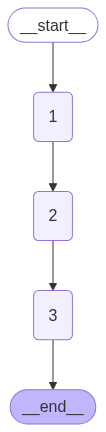

In [193]:
draw_graph(my_graph)

In [194]:
results = my_graph.invoke({"messages": HumanMessage('Hi')})

In [ ]:
results

{'messages': [HumanMessage(content='I,m node 1', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='I,m node 2', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='I,m node 3', additional_kwargs={}, response_metadata={})]}

In [ ]:
results = my_graph.invoke({"messages": results['messages']})

: 